# Distance Metrics
In this notebook we will investigate a couple of common distance metrics

In [6]:
import numpy as np
import matplotlib.pyplot as plt

The three distance metrics we will investigate are
#### Euclidean:
$$d_{\text{euclidean}}(A, B) = \sqrt{\sum_{i=1}^n (A_i - B_i)^2}$$
#### Manhattan:
$$d_{\text{manhattan}}(A, B) = \sum_{i=1}^n |A_i - B_i|$$
#### Cosine:
$$d_{\text{cosine}}(A, B) = 1 - \frac{A \cdot B}{\|A\| \|B\|}$$

In [37]:
def euclidean_distance(vec1, vec2, *args):
    return np.linalg.norm(vec1 - vec2)

def manhattan_distance(vec1, vec2, *args):
    return np.sum(np.abs(vec1 - vec2))

def cosine_distance(vec1, vec2, *args):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return 1 - (dot_product / (norm_vec1 * norm_vec2))

To get an intuition about how these metrics behave, here is a function that plots a heatmap of the metric calculated from the origin (0,0)

In [40]:
def plot_distance_heatmap(distance_metric, x_range=(-20, 20), y_range=(-20, 20), resolution=200, name='', **kwargs):
    """
    Plots a heatmap of the given distance metric for 2D vectors over a specified range.

    Parameters:
    - distance_metric: A function that takes two 2D vectors and returns a scalar distance.
    - x_range: A tuple specifying the range of x values (min, max).
    - y_range: A tuple specifying the range of y values (min, max).
    - resolution: The number of points along each axis.
    """
    # Generate a grid of points
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)

    # Compute the distance metric for each point in the grid
    Z = np.zeros_like(X)
    for i in range(resolution):
        for j in range(resolution):
            vector = np.array([X[i, j], Y[i, j]])
            Z[i, j] = distance_metric(vector, np.array([1e-5, 1e-5]), kwargs)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.colorbar(label='Distance')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid("both")
    plt.title(f'Distance Heatmap {name}')
    plt.show()

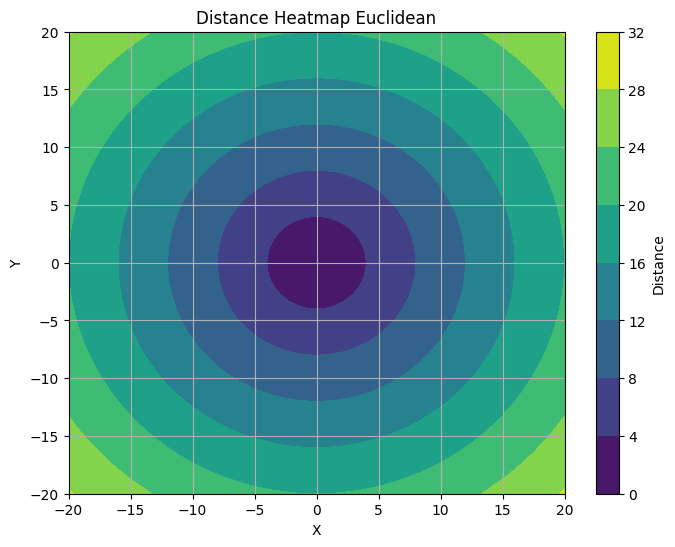

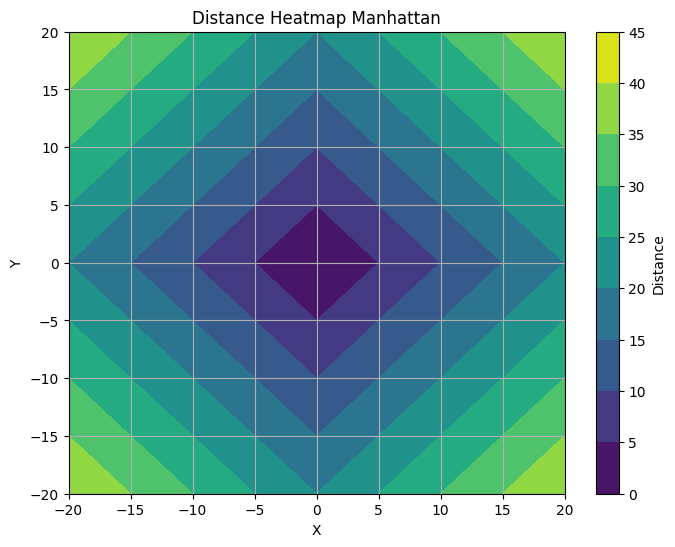

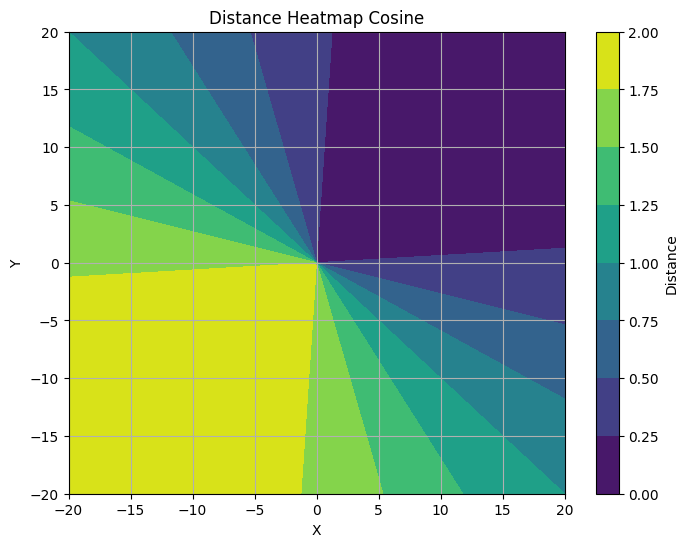

In [41]:
for name, metric in zip(("Euclidean", "Manhattan", "Cosine",), (euclidean_distance, manhattan_distance, cosine_distance)):
    plot_distance_heatmap(metric, name=name)

The Minowski distance is a general formulation with a parameter p that specifies which norm to use. The Manhattan and Euclidean Distances are simply Minowski with p=1 and p=2 often called L1 and L2.

In [43]:
def minkowski_distance(vec1, vec2, kwargs):
    p = kwargs['p']
    return np.power(np.sum(np.power(np.abs(vec1 - vec2), p)), 1/p)

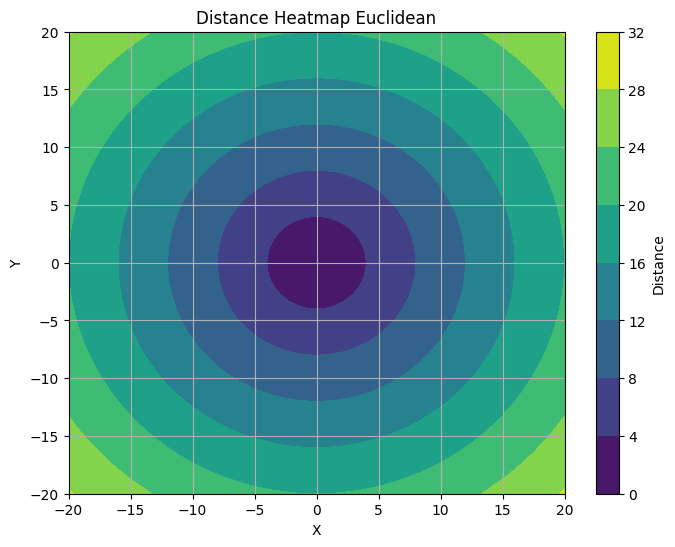

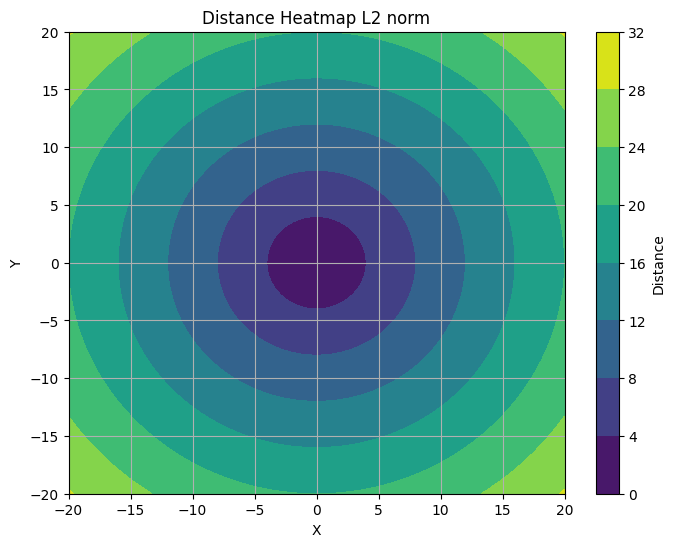

In [45]:
plot_distance_heatmap(euclidean_distance, name="Euclidean")
plot_distance_heatmap(minkowski_distance, name='L2 norm', p=2)

Now we investigate what happens when you approach the limits of 0 and infinity:
Pay close attention to the values of the axes, if we increase/decrease by much more we run into under/overflow issues!!

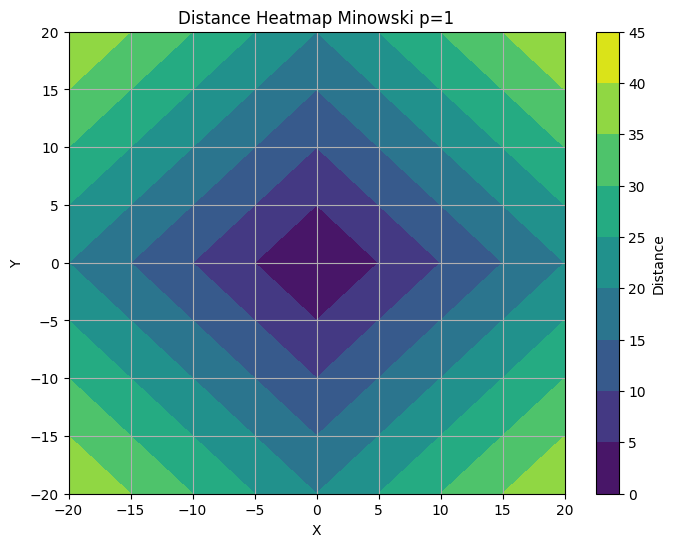

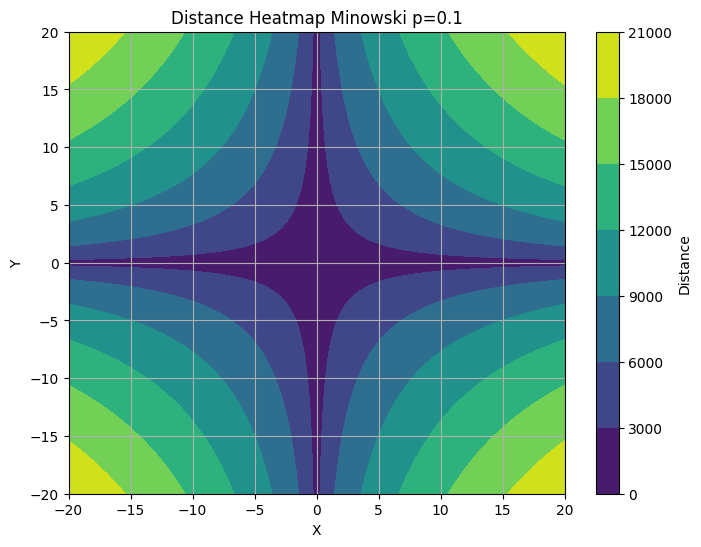

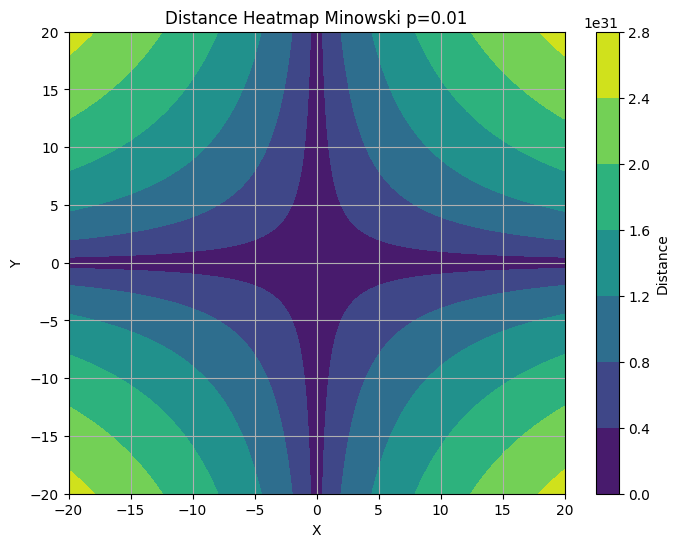

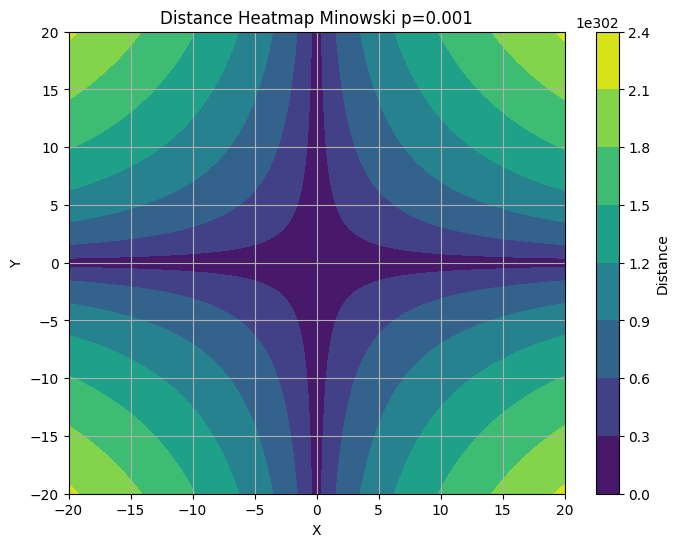

In [51]:
for val in [1, 1e-1, 1e-2, 1e-3]:
    plot_distance_heatmap(minkowski_distance, name=f'Minowski p={val}', p=val)

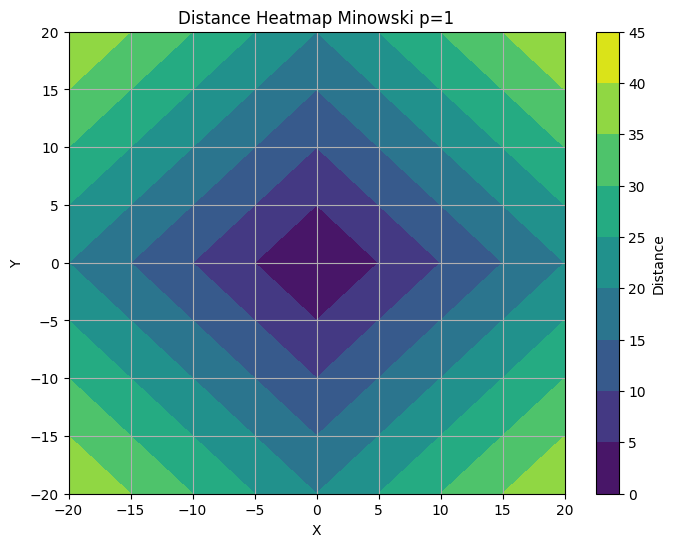

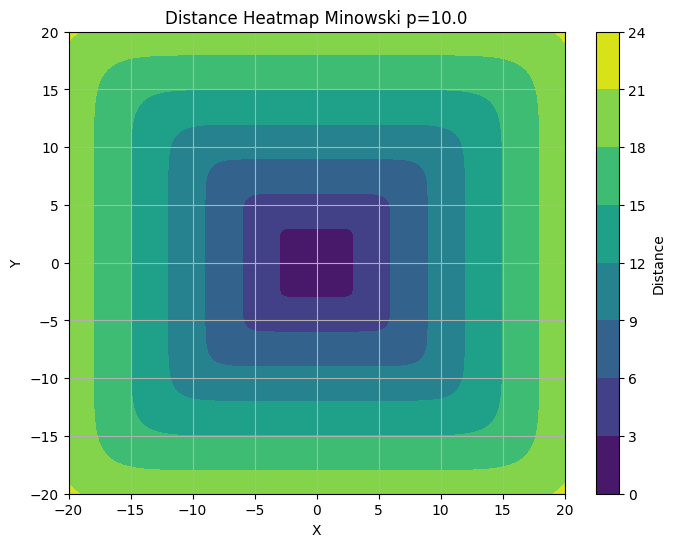

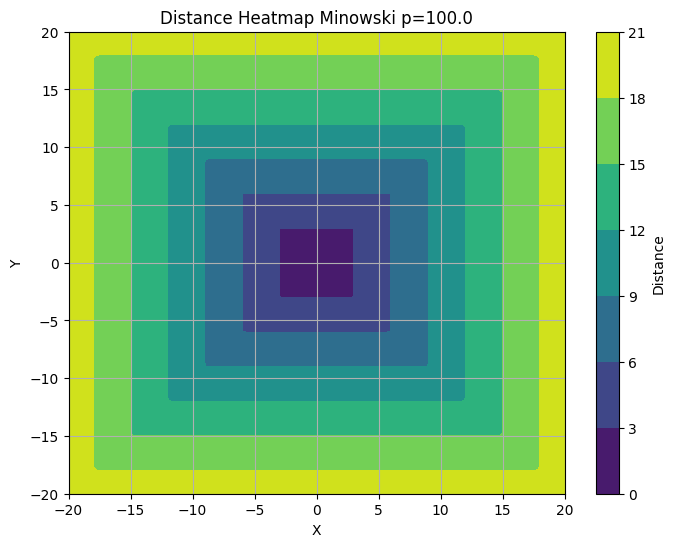

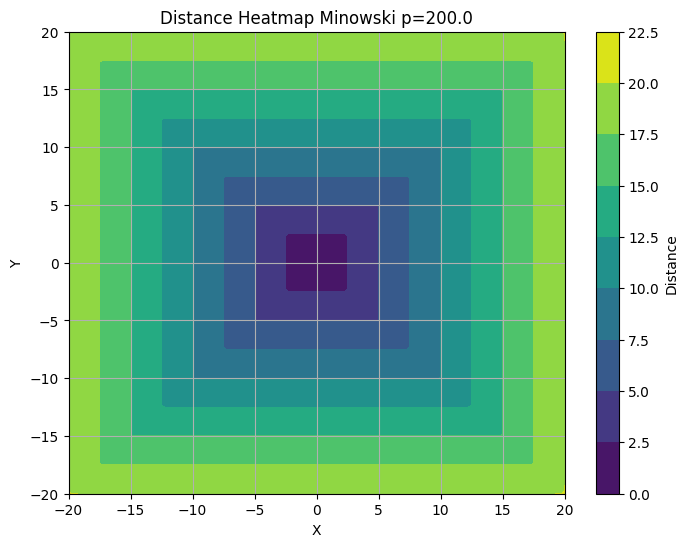

In [54]:
for val in [1, 1e+1, 1e+2, 2e+2]:
    plot_distance_heatmap(minkowski_distance, name=f'Minowski p={val}', p=val)